In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
img = cv2.imread('Digital watermark\images1\img3.jpg', cv2.IMREAD_GRAYSCALE)

True

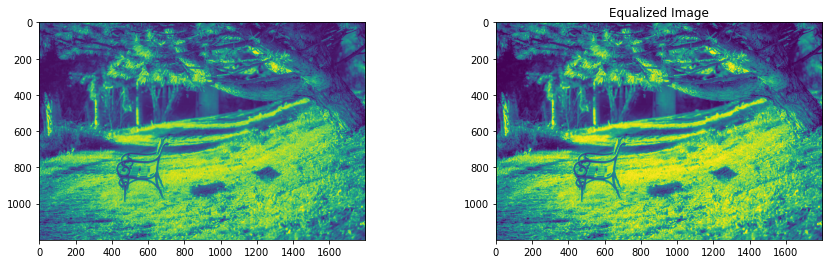

In [33]:
img_eq = cv2.equalizeHist(img)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(img_eq)
plt.title('Equalized Image')

cv2.imwrite('Digital watermark\images1\modified_images\modified_image_1.jpg', img_eq)

True

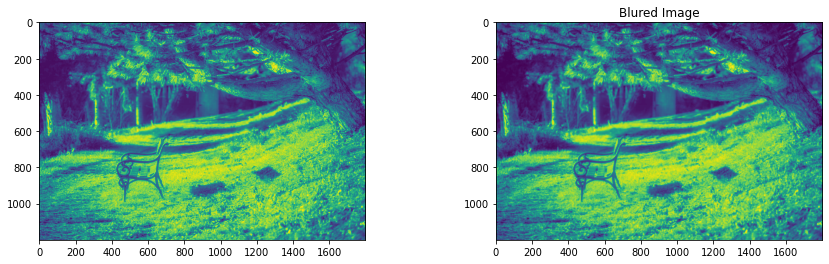

In [34]:
gaussBlur = cv2.GaussianBlur(img,(5,5),cv2.BORDER_DEFAULT)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(gaussBlur)
plt.title('Blured Image')

cv2.imwrite('Digital watermark\images1\modified_images\modified_image_2.jpg',gaussBlur)

True

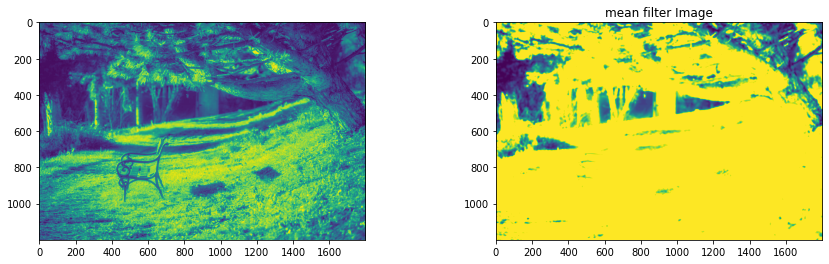

In [38]:
kernel = np.ones((10,10),np.float32)/25
meanFilter = cv2.filter2D(img,-1,kernel)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(meanFilter)
plt.title('mean filter Image')


cv2.imwrite('Digital watermark\images1\modified_images\modified_image_3.jpg',meanFilter)

True

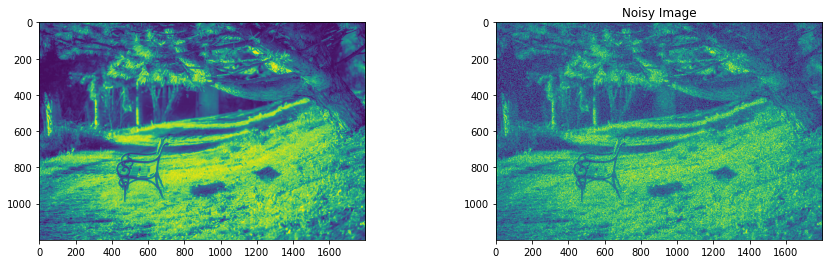

In [37]:
from skimage.util import random_noise

noise_img = random_noise(img, mode='s&p',amount=0.3)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(noise_img)
plt.title('Noisy Image')


cv2.imwrite('Digital watermark\images1\modified_images\modified_image_4.jpg',noise_img)

True

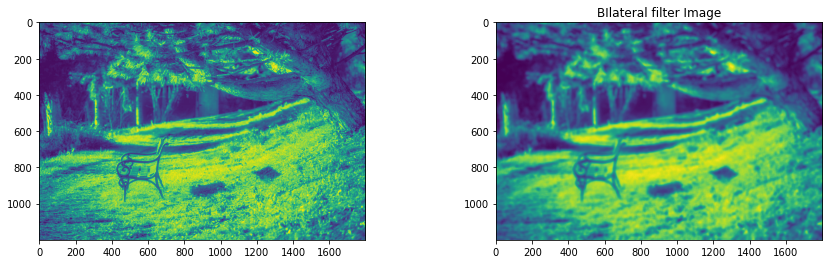

In [39]:
Bilateral_filter = cv2.bilateralFilter(img,20,200,300)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(Bilateral_filter)
plt.title('BIlateral filter Image')


cv2.imwrite('Digital watermark\images1\modified_images\modified_image_5.jpg',Bilateral_filter)

True

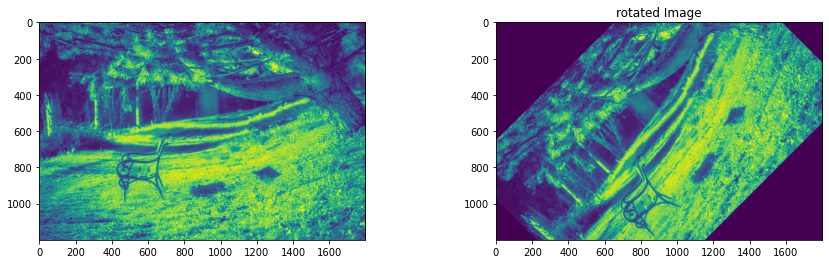

In [40]:
(h, w) = img.shape[:2]

angle = 45
scale = 1.0

# Get rotation matrix
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, angle, scale)

# Apply rotation to image
rotated_img = cv2.warpAffine(img, M, (w, h))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(rotated_img)
plt.title('rotated Image')


cv2.imwrite('Digital watermark\images1\modified_images\modified_image_6.jpg',rotated_img)

True

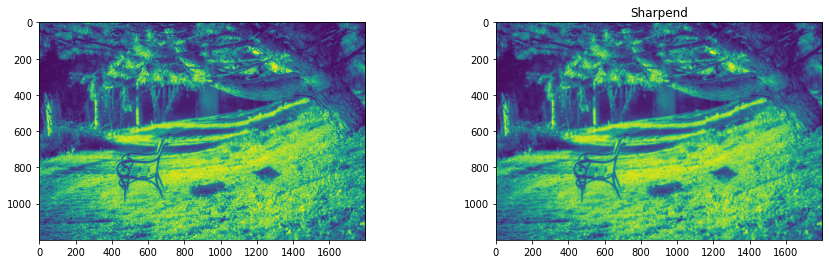

In [41]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
sharpened = np.uint8(np.clip(img + laplacian, 0, 255))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(sharpened)
plt.title('Sharpend')

cv2.imwrite('Digital watermark\images1\modified_images\modified_image_7.jpg',sharpened)

True

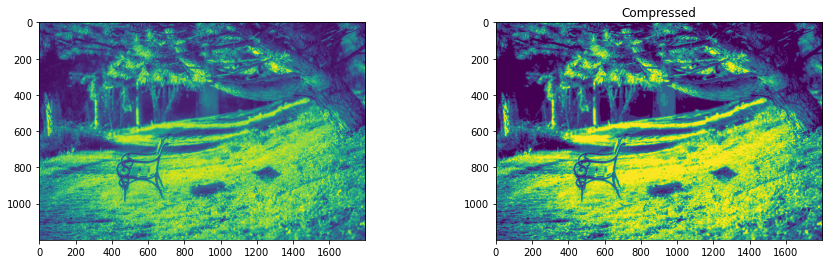

In [42]:
pixels = img.reshape((-1,3))

pixels = np.float32(pixels)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8

# Apply k-means clustering
ret, labels, centers = cv2.kmeans(pixels, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to uint8 and reshape into original image shape
centers = np.uint8(centers)
res = centers[labels.flatten()]
res2 = res.reshape((img.shape))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(res2)
plt.title('Compressed')

cv2.imwrite('Digital watermark\images1\modified_images\modified_image_8.jpg',res2)

True

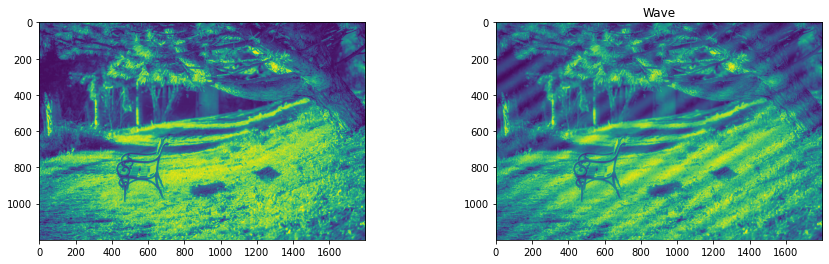

In [43]:
(h, w) = img.shape[:2]
wave = np.zeros((rows, cols), dtype=np.float32)
x = np.linspace(0, 1, w)
y = np.linspace(0, 1, h)
X, Y = np.meshgrid(x, y)
frequency = 10
amplitude = 30
wave = amplitude * np.sin((X + Y) * frequency * 2 * np.pi)

# add wave to image
img_waves = img.astype(np.float32) + wave
img_waves = cv2.normalize(img_waves, None, 0, 255, cv2.NORM_MINMAX)
img_waves = img_waves.astype(np.uint8)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

axes[0].imshow(img)
plt.title('Original Image')

axes[1].imshow(img_waves)
plt.title('Wave')


cv2.imwrite('Digital watermark\images1\modified_images\modified_image_9.jpg',img_waves)